In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import treeswift as ts

In [2]:
taxdict = {}
taxonomy_tree = ts.read_tree_newick('../data/metazoan_taxonomy.nwk')
for tax in ['Ctenophora', 
            'Hemichordata', 
            'Bryozoa', 
            'Rotifera', 
            'Chordata', 
            'Echinodermata', 
            'Arthropoda', 
            'Mollusca', 
            'Annelida', 
            'Nematoda', 
            'Platyhelminthes',
            'Cnidaria']:
    for node in taxonomy_tree.root.traverse_bfs():
        if node[0].label.strip("'") == tax:
            for i in node[0].traverse_leaves():
                taxdict[i.label.strip("'").replace(' ', '_')] = tax 
                
counts_df = pd.read_csv('../data/znf_ret_counts.txt', sep='\t').dropna()
counts_df['genus'] = counts_df['species'].apply(lambda x: x.split('_')[0])
counts_df['taxonomy'] = counts_df.species.apply(lambda x: taxdict.get(x, 'Other'))

time_tree = ts.read_tree_newick('../data/metazoan_timetree.nwk')
time_tree = time_tree.extract_tree_with(counts_df.species)
counts_df['in_timetree'] = False
counts_df.loc[counts_df.species.isin([s.label for s in time_tree.root.traverse_leaves()]), 'in_timetree'] = True

genus_df = counts_df.groupby('genus').sample(1)
genus_df = genus_df.loc[(genus_df.scaffold_n50 > 500000) & (genus_df.scaffold_n50 < 5000000)]

print(genus_df.head())

                  species   znfs  retroelements  scaffold_n50        genus  \
1   Abscondita_terminalis  440.0         7319.0       1220005   Abscondita   
2      Acanthaster_planci  116.0         1827.0       1521119  Acanthaster   
9      Accipiter_gentilis  136.0         7866.0       1025078    Accipiter   
26  Acromyrmex_insinuator  100.0         1195.0       1153669   Acromyrmex   
52      Adela_reaumurella  449.0         6179.0        634530        Adela   

         taxonomy  in_timetree  
1      Arthropoda        False  
2   Echinodermata        False  
9        Chordata         True  
26     Arthropoda        False  
52     Arthropoda         True  


# Quality Control
A major concern of this analysis is confounding caused by N50 correlation with either C2H2 or retroelement numbers. To minimise this, we set a cutoff value for minimum genome quality.

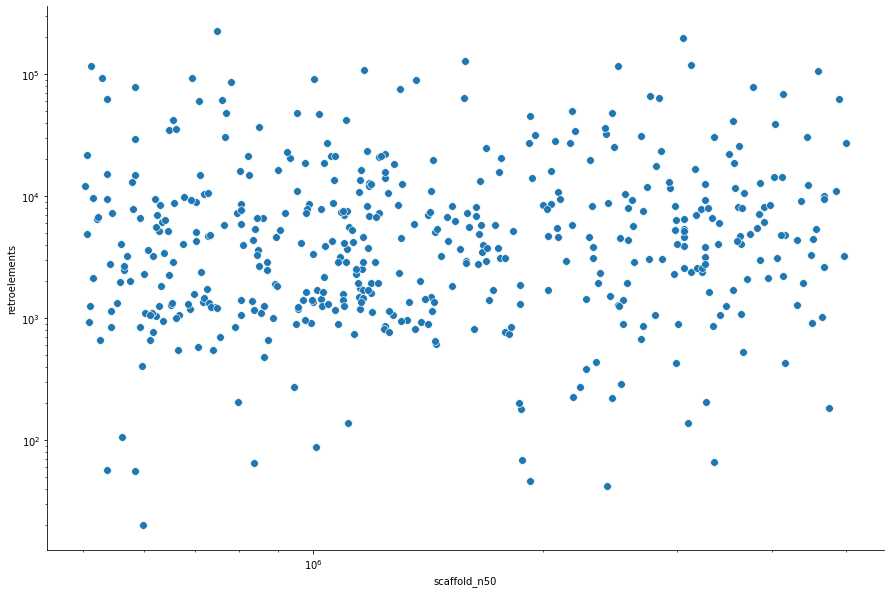

SpearmanrResult(correlation=0.10618258861885845, pvalue=0.021176250718898223)


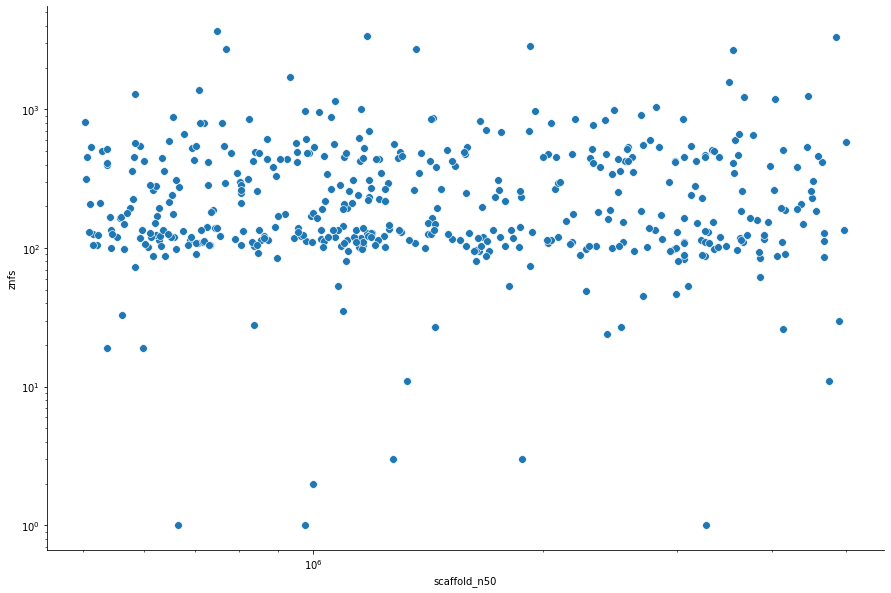

SpearmanrResult(correlation=-0.0012234376078935282, pvalue=0.9788735650990124)


In [3]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=genus_df, 
                x='scaffold_n50',
                y='retroelements', 
                s=60)

ax.set_xscale('log')
ax.set_yscale('log')
sns.despine()
plt.show()

print(stats.spearmanr(genus_df.retroelements, genus_df.scaffold_n50))

fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=genus_df, 
                x='scaffold_n50',
                y='znfs', 
                s=60)

ax.set_xscale('log')
ax.set_yscale('log')
sns.despine()
plt.show()

print(stats.spearmanr(genus_df.znfs, genus_df.scaffold_n50))

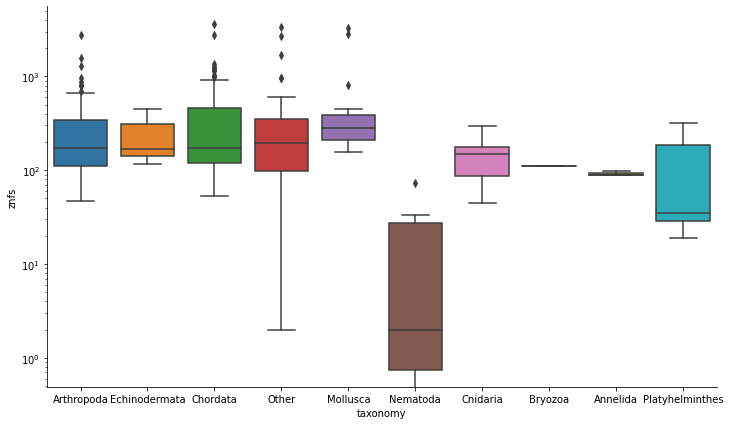

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=genus_df, x='taxonomy', y='znfs')
ax.set_yscale('log')
sns.despine()
plt.show()

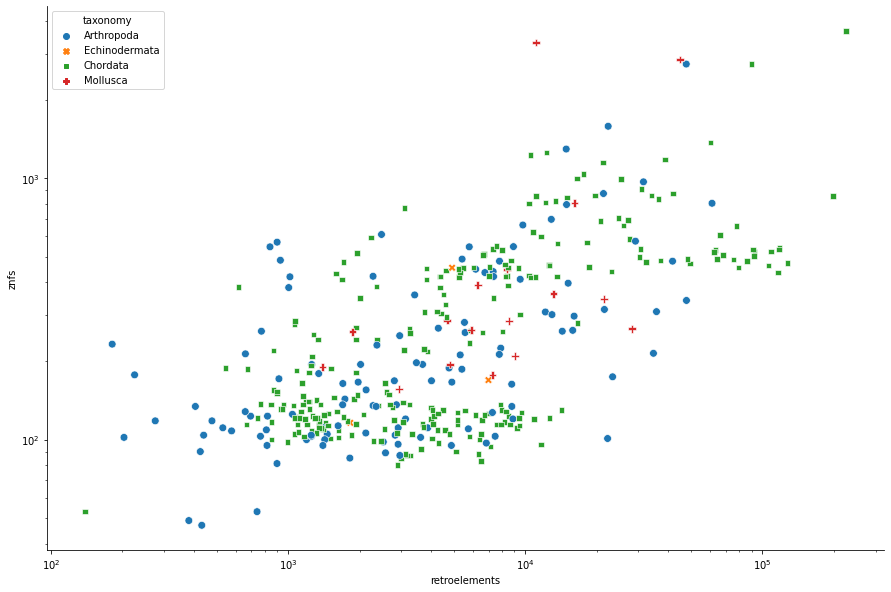

SpearmanrResult(correlation=0.6056097022980301, pvalue=1.7767525202371927e-48)


In [5]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=genus_df.loc[genus_df.taxonomy.isin(['Arthropoda', 'Mollusca', 'Echinodermata', 'Chordata'])], 
                x='retroelements', 
                y='znfs', 
                hue='taxonomy',
                style='taxonomy',
                s=60)

ax.set_xscale('log')
ax.set_yscale('log')
sns.despine()
plt.show()

print(stats.spearmanr(genus_df.znfs, genus_df.retroelements))

Bryozoa
SpearmanrResult(correlation=nan, pvalue=nan)


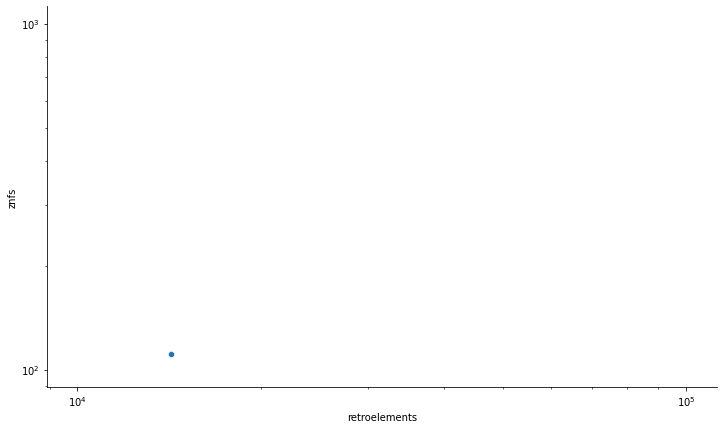

Cnidaria
SpearmanrResult(correlation=0.4065934065934066, pvalue=0.14910193900151342)


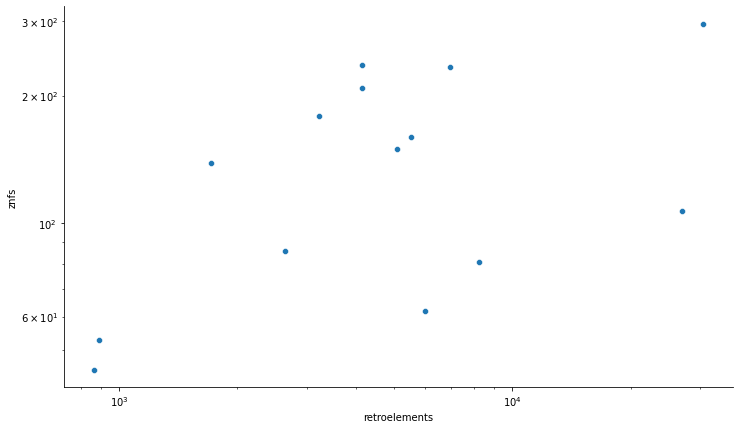

Platyhelminthes
SpearmanrResult(correlation=0.6666937223947136, pvalue=0.10192046024618232)


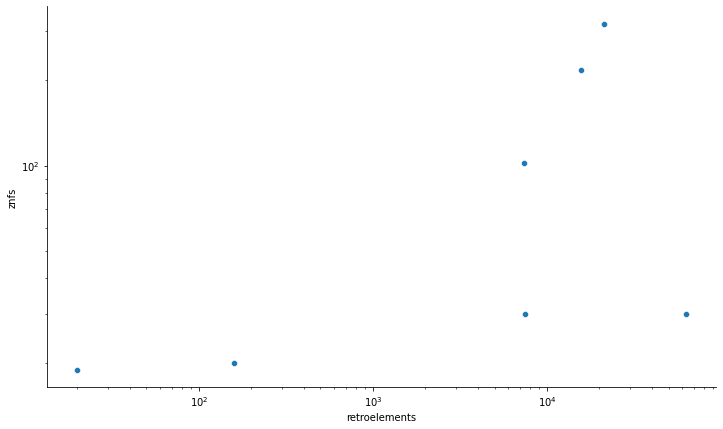

Other
SpearmanrResult(correlation=0.7541629540638668, pvalue=1.920711461021478e-08)


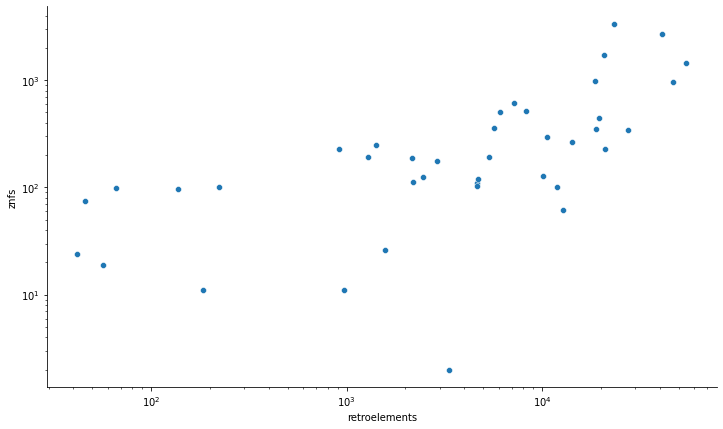

Echinodermata
SpearmanrResult(correlation=0.6000000000000001, pvalue=0.3999999999999999)


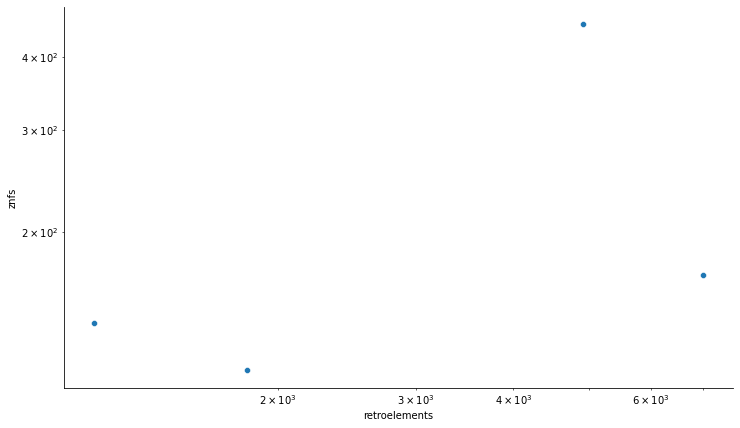

Mollusca
SpearmanrResult(correlation=0.627450980392157, pvalue=0.0070113456965958144)


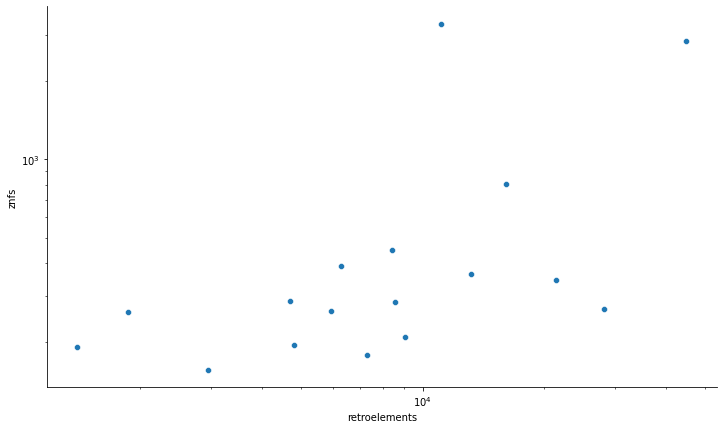

Annelida
SpearmanrResult(correlation=0.0, pvalue=1.0)


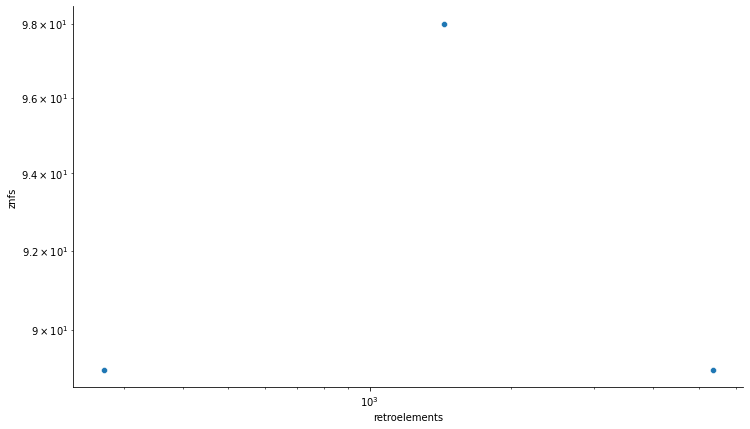

Arthropoda
SpearmanrResult(correlation=0.5760929850947859, pvalue=4.551371587361026e-11)


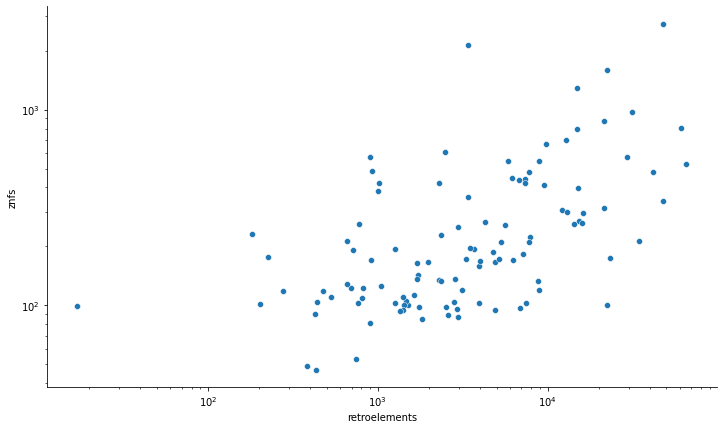

Chordata
SpearmanrResult(correlation=0.5870616494725851, pvalue=2.8420230445829197e-24)


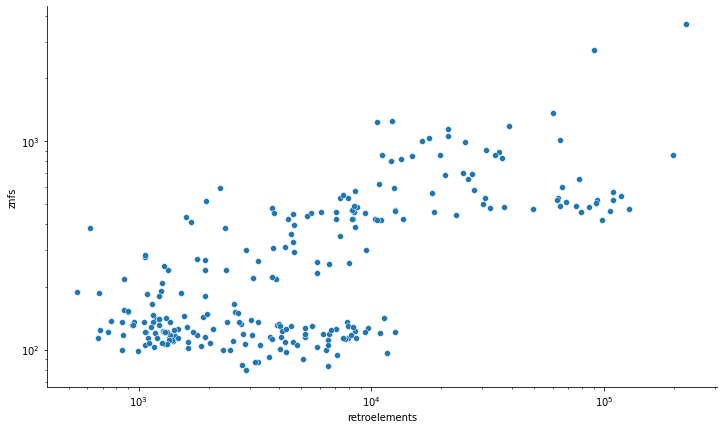

Nematoda
SpearmanrResult(correlation=-0.5800910270496299, pvalue=0.048012492018050176)


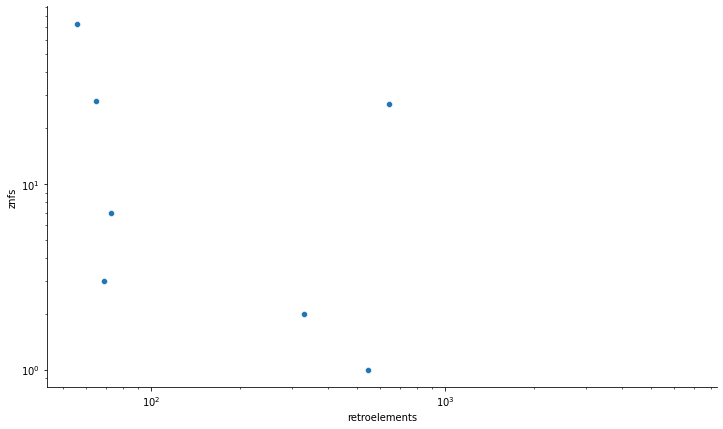

In [47]:
for tax in set(genus_df.taxonomy):
    print(tax)
    print(stats.spearmanr(genus_df.loc[genus_df.taxonomy==tax].znfs, genus_df.loc[genus_df.taxonomy==tax].retroelements))
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.scatterplot(data=genus_df.loc[genus_df.taxonomy==tax], x='retroelements', y='znfs')
    ax.set_xscale('log')
    ax.set_yscale('log')
    sns.despine()
    plt.show()

In [40]:
print(stats.spearmanr(genus_df.znfs, genus_df.retroelements))

SpearmanrResult(correlation=0.6339656567304682, pvalue=1.0776422058597301e-178)


In [16]:
print(genus_df.loc[genus_df.znfs < 10])

                       species  znfs  retroelements  scaffold_n50  \
134     Ancylostoma_ceylanicum   0.0         3435.0        668412   
144    Angiostrongylus_vasorum   6.0         4366.0       1673247   
291       Ascaris_lumbricoides   0.0          256.0       4633382   
347   Baylisascaris_schroederi   0.0          204.0        798259   
887          Dicyema_japonicum   2.0         3339.0       1000208   
900     Diploscapter_coronatus   0.0           88.0       1007652   
918     Dracunculus_medinensis   1.0          547.0        665026   
1382      Heterodera_schachtii   3.0         1055.0       1273070   
2193      Parascaris_univalens   3.0           69.0       1878535   

                genus  taxonomy  in_timetree  
134       Ancylostoma  Nematoda        False  
144   Angiostrongylus  Nematoda        False  
291           Ascaris  Nematoda        False  
347     Baylisascaris  Nematoda        False  
887           Dicyema     Other        False  
900      Diploscapter  Nema